### Digits recognition using CNN

#### Loading required packages

In [1]:
%pylab inline

import pandas as pd
import os
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.
/home/sivaji/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
%%bash

ls -ltra

ls -ltra ./Images/

total 652
-rw-rw-r-- 1 sivaji sivaji 576905 Sep 30  2016 train.csv
drwxrwxr-x 4 sivaji sivaji   4096 Oct  1  2016 Images
drwxrwxr-x 3 sivaji sivaji   4096 Dec  7 12:23 ..
drwxr-xr-x 2 sivaji sivaji   4096 Dec  7 17:08 .ipynb_checkpoints
-rw-rw-r-- 1 sivaji sivaji  71971 Dec  7 17:08 CNN.ipynb
drwxrwxr-x 4 sivaji sivaji   4096 Dec  7 17:08 .
total 1836
drwxrwxr-x 2 sivaji sivaji  569344 Oct  1  2016 test
drwxrwxr-x 2 sivaji sivaji 1298432 Oct  1  2016 train
drwxrwxr-x 4 sivaji sivaji    4096 Oct  1  2016 .
drwxrwxr-x 4 sivaji sivaji    4096 Dec  7 17:08 ..


#### Reading training files and it's labes

In [3]:
train = pd.read_csv('./train.csv')
trfiles = list(train['filename'])
label = list(train['label'])
tsfiles = os.listdir('./Images/test/')

#### Reading images from the disk and creating as an numpy array

In [4]:
path  = './Images/train/'
train_x = []
for f in trfiles:
    img = imread(path + f,flatten= True,mode = 'L')
    img = img.reshape(28,28,1)
    train_x.append(img)
    
path  = './Images/test/'
test_x = []
for f in tsfiles:
    img = imread(path + f,flatten= True,mode = 'L')
    img = img.reshape(28,28,1)
    test_x.append(img)

In [5]:
train_x = np.array(train_x)
test_x = np.array(test_x)
train_y = np.array(label)

#### Spliting training data into train and validation

In [6]:
trainx, valx, trainy,valy = train_test_split(train_x,train_y,test_size=.3)

# converting lables into dummies
trainy = to_categorical(trainy)
valy = to_categorical(valy)

#### Training a model

In [7]:
## building CNN layers
model = Sequential() 
model.add(Conv2D(50,( 3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# model.output_shape

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(trainx, trainy, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
34300/34300 [==============================] - 18s 523us/step - loss: 0.4381 - acc: 0.8647
Epoch 2/10
34300/34300 [==============================] - 18s 523us/step - loss: 0.1448 - acc: 0.9603
Epoch 3/10
34300/34300 [==============================] - 18s 522us/step - loss: 0.1097 - acc: 0.9706
Epoch 4/10
34300/34300 [==============================] - 18s 523us/step - loss: 0.0862 - acc: 0.9777
Epoch 5/10
34300/34300 [==============================] - 18s 526us/step - loss: 0.0720 - acc: 0.9799
Epoch 6/10
34300/34300 [==============================] - 18s 527us/step - loss: 0.0631 - acc: 0.9820
Epoch 7/10
34300/34300 [==============================] - 18s 536us/step - loss: 0.0549 - acc: 0.9841
Epoch 8/10
34300/34300 [==============================] - 18s 527us/step - loss: 0.0513 - acc: 0.9855
Epoch 9/10
34300/34300 [==============================] - 18s 533us/step - loss: 0.0487 - acc: 0.9871
Epoch 10/10
34300/34300 [==============================] - 18s 525us/step - loss: 

In [10]:
valpred = model.predict(valx)
print('Accuracy in validation:', accuracy_score(np.argmax(valy,axis=1),np.argmax(valpred,axis = 1)))

Accuracy in validation: 0.988843537415


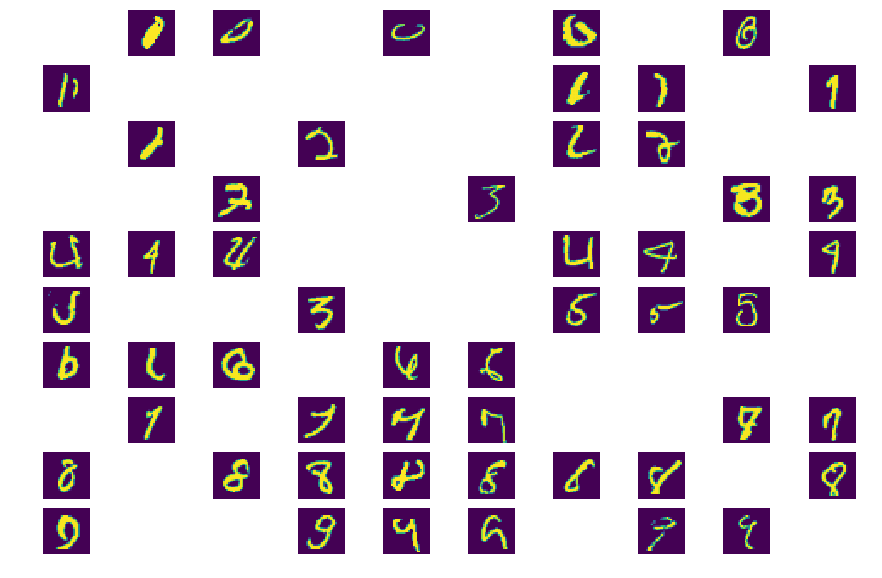

In [11]:
# mis-classification visualization in validation dataset

actual = np.argmax(valy,axis=1)[np.argmax(valy,axis=1) != np.argmax(valpred,axis = 1)]
predicted = np.argmax(valpred,axis = 1)[np.argmax(valy,axis=1) != np.argmax(valpred,axis = 1)]
pltdt = valx[np.argmax(valy,axis=1) != np.argmax(valpred,axis = 1)]
pltdt = pltdt.reshape(pltdt.shape[0],28,28)


f, axarr = plt.subplots(10, 10)
f.set_figheight(10)
f.set_figwidth(15)
# f.axis('off')
np.vectorize(lambda ax:ax.axis('off'))(axarr)
for i in range(10):
    
    p = predicted[actual == i]
    d = pltdt[actual == i]
    for j in range(10):
        p1 = p[p== j]
        d1 = d[p == j]
        if d1.shape[0] != 0:
            d1 = d1[0]
            axarr[i,j].imshow(d1.reshape(28,28))            
            axarr[i,j].axis('off')
# plt.tight_layout()
plt.show()

In [12]:
testpred = model.predict(test_x)
submit = pd.DataFrame({'filename':tsfiles,'label':np.argmax(testpred,axis=1)})
submit.head()

,filename,label
0,68281.png,0
1,52697.png,1
2,50626.png,7
3,63526.png,4
4,52854.png,4
